| Problem | Formula|Search Domain|
|---      |----    |----|
|VU1|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=\frac{1}{x^2_1+x^2_2+1}\\f_{2}\left(x_1, x_2\right)={x^2_1+3x^2_2+1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$|
|VU2|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=x_1+x_2+1\\f_{2}\left(x_1, x_2\right)={x^2_1+2x^2_2-1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |

In [41]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
def calculate_hv(result):
    path = result['path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Iteration','Evaluations'],ascending =True).reset_index(drop=True)
    return output_result

def nadir_deal_point(result):
    path = result['solution_path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    return [approx_ideal,approx_nadir]
def nadir_deal_point_result(result):
    get = result.apply(nadir_deal_point, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['approx_ideal','approx_nadir'])
    final_result = pd.concat([result, df],axis=1)
    return final_result

def igd_plus(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    igd_plus = get_performance_indicator("igd+", pf)
    igd_value = igd_plus.do(F)
    return igd_value

# Kursawe problem 
## - (#variables / #objectives)
## - vu1 2/2
## - vu2 2/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [42]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
result = result.loc[(result['Problem']=='VU1' )| (result['Problem']=='VU2') ].reset_index(drop=True)
print(f"The number of records {len(result)}")

The number of records 96


In [43]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-2:].head(5)

,path,image_location
0,VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-100_Obj-2_...,Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Iteration-...
1,VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-200_Obj-2_...,Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Iteration-...
2,VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-100_Obj-2_...,Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Iteration-...
3,VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-200_Obj-2_...,Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Iteration-...
4,VU1/NSGA2_VU1_2/VU1_NSGA2_Iteration-200_Obj-2_...,Images/VU1/NSGA2_VU1Var-2/VU1_NSGA2_Iteration-...


In [44]:
vu1 = result.loc[result['Problem']=='VU1'].reset_index(drop=True)
vu2 = result.loc[result['Problem']=='VU2'].reset_index(drop=True)

# VU1 

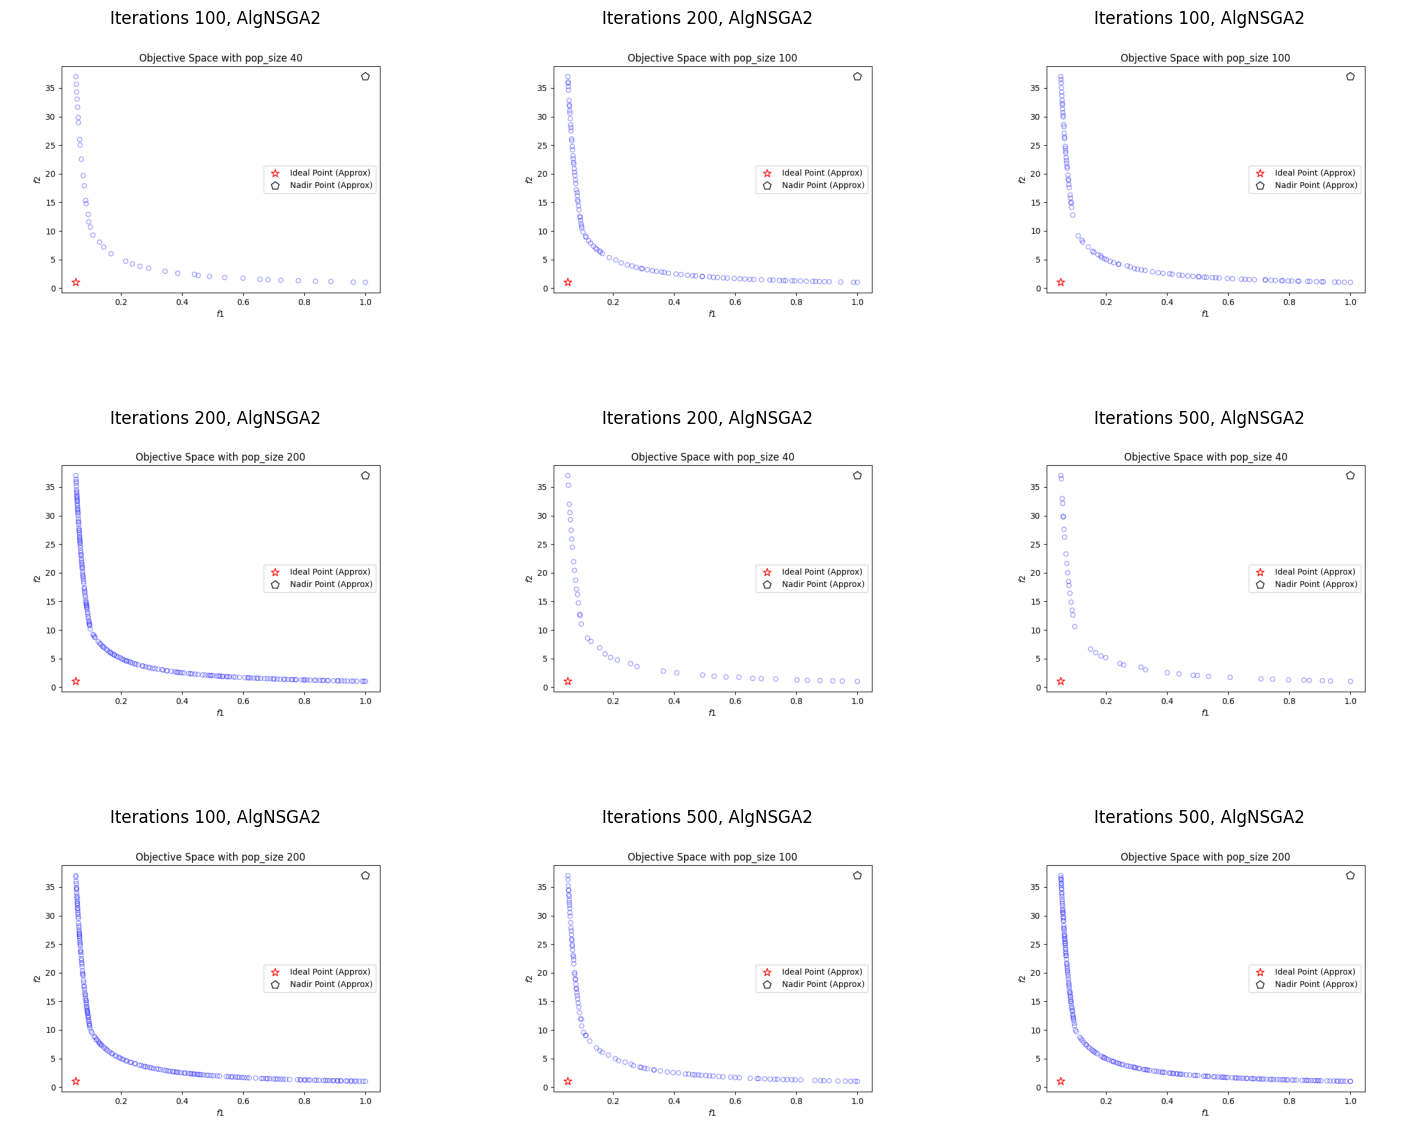

In [45]:
# more figures can be found here: Result/Images/VU1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = vu1['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {vu1.Iteration[i]}, Alg{vu1.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [46]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(vu1['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1  ,37])
hv_result(vu1)

Global nadir point for kur1 with two variables is :[ 1. 37.]
ref_point is [ 1 37]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,VU1,AGNOMEN,10000,100,2,2,40,3.275810,31.687173,0.001141
1,VU1,AGNOMEN,10000,100,2,2,200,3.302224,31.687173,0.000508
2,VU1,AGNOMEN,10000,100,2,2,100,3.293055,31.687173,0.000502
3,VU1,AGNOMEN,20000,200,2,2,100,6.663450,31.688961,0.000557
4,VU1,AGNOMEN,20000,200,2,2,200,6.652167,31.688961,0.000515
5,VU1,AGNOMEN,20000,200,2,2,40,6.790743,31.688961,0.000513
6,VU1,AGNOMEN,50000,500,2,2,40,17.271966,31.681485,0.000529
7,VU1,AGNOMEN,50000,500,2,2,100,17.377794,31.681485,0.000575
8,VU1,AGNOMEN,50000,500,2,2,200,17.200717,31.681485,0.000566
9,VU1,AGNOMEN,100000,1000,2,2,40,35.299425,31.690290,0.000488


In [47]:
ref_point = np.array([5  ,5])
hv_result(vu1)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,VU1,AGNOMEN,10000,100,2,2,40,3.275810,18.352053,0.000311
1,VU1,AGNOMEN,10000,100,2,2,200,3.302224,18.352053,0.000335
2,VU1,AGNOMEN,10000,100,2,2,100,3.293055,18.352053,0.000293
3,VU1,AGNOMEN,20000,200,2,2,100,6.663450,18.352251,0.000337
4,VU1,AGNOMEN,20000,200,2,2,200,6.652167,18.352251,0.000364
5,VU1,AGNOMEN,20000,200,2,2,40,6.790743,18.352251,0.000367
6,VU1,AGNOMEN,50000,500,2,2,40,17.271966,18.349417,0.000317
7,VU1,AGNOMEN,50000,500,2,2,100,17.377794,18.349417,0.000307
8,VU1,AGNOMEN,50000,500,2,2,200,17.200717,18.349417,0.000348
9,VU1,AGNOMEN,100000,1000,2,2,40,35.299425,18.353165,0.000317


# VU2 

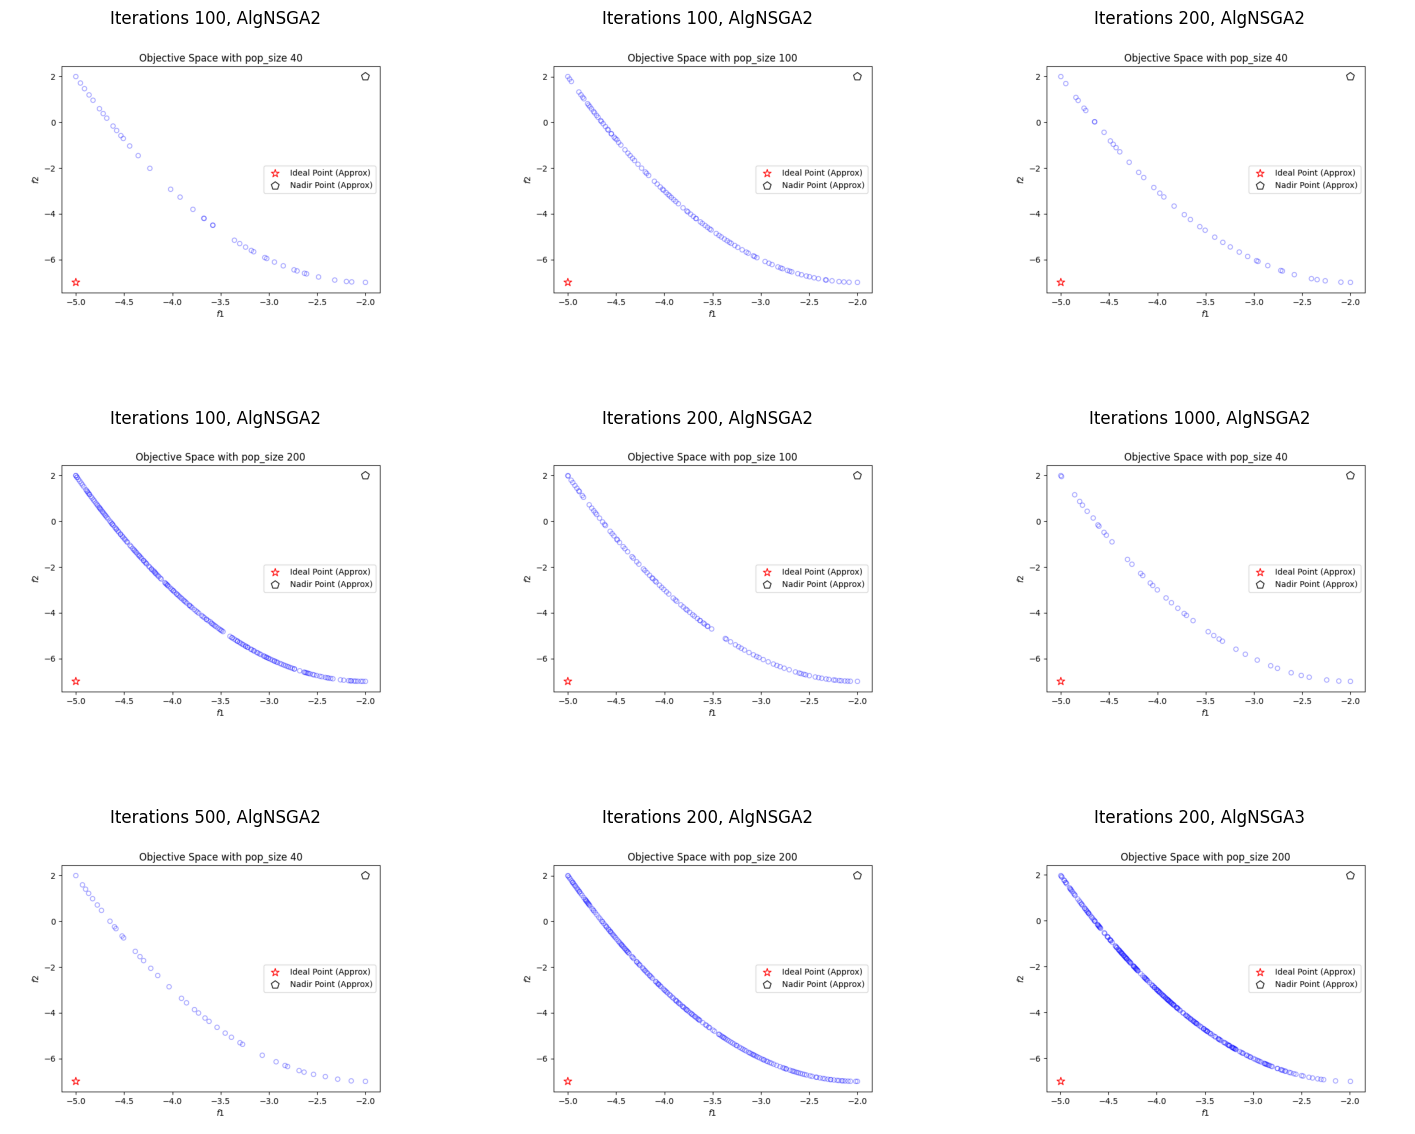

In [48]:
# more figures can be found here: Result/Images/VU2/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = vu2['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {vu2.Iteration[i]}, Alg{vu2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [51]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(vu2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-2,2.  ])
hv_result(vu2)

Global nadir point for kur1 with two variables is :[-1.95  2.  ]
ref_point is [-2.  2.]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,VU2,AGNOMEN,10000,100,2,2,40,3.234939,17.850010,0.000946
1,VU2,AGNOMEN,10000,100,2,2,100,3.225239,17.850010,0.000537
2,VU2,AGNOMEN,10000,100,2,2,200,3.764208,17.850010,0.000566
3,VU2,AGNOMEN,20000,200,2,2,40,6.791945,17.837735,0.000482
4,VU2,AGNOMEN,20000,200,2,2,100,6.857721,17.837735,0.000556
5,VU2,AGNOMEN,20000,200,2,2,200,6.866907,17.837735,0.000515
6,VU2,AGNOMEN,50000,500,2,2,100,18.465827,17.837815,0.000445
7,VU2,AGNOMEN,50000,500,2,2,200,18.859266,17.837815,0.000441
8,VU2,AGNOMEN,50000,500,2,2,40,19.040967,17.837815,0.000473
9,VU2,AGNOMEN,100000,1000,2,2,40,38.287093,17.841423,0.000470


In [50]:
ef_point = np.array([5, 5])
hv_result(vu2)

ref_point is [-1.95  2.  ]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,hv_exc_time
0,VU2,AGNOMEN,10000,100,2,2,40,3.234939,18.300010,0.000468
1,VU2,AGNOMEN,10000,100,2,2,100,3.225239,18.300010,0.000474
2,VU2,AGNOMEN,10000,100,2,2,200,3.764208,18.300010,0.000463
3,VU2,AGNOMEN,20000,200,2,2,40,6.791945,18.287735,0.000508
4,VU2,AGNOMEN,20000,200,2,2,100,6.857721,18.287735,0.000524
5,VU2,AGNOMEN,20000,200,2,2,200,6.866907,18.287735,0.000498
6,VU2,AGNOMEN,50000,500,2,2,100,18.465827,18.287815,0.000486
7,VU2,AGNOMEN,50000,500,2,2,200,18.859266,18.287815,0.000508
8,VU2,AGNOMEN,50000,500,2,2,40,19.040967,18.287815,0.000469
9,VU2,AGNOMEN,100000,1000,2,2,40,38.287093,18.291423,0.000521
